In [49]:
#salgado martinez yuren joshua
import pandas as pd
df = pd.read_csv('super_hero_info.csv', header = 0,sep =',')
df

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...,...
729,729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


In [ ]:
#1. cual es el promedio de estatura para un super heroe malo hombre de Marvel Comics
#2. cual es el minimo de estatura para un super heroe malo mujer de Marvel Comics
#3. cual es el mediana de estatura para un super heroe bueno hombre de Marvel Comics
#4. cual es el desviación estandar de estatura para un super heroe bueno mujer de Marvel Comics
#5. hacer la prueba de bondad y ajuste con shapiro-wilk para la estatura
#6. hacer la prueba de bondad y ajuste con kolmogorov-smirnov para la estatura
#7. hacer la prueba de bondad y ajuste con anderson para la estatura 
#8. comprobar el teroema del limite central la estatura

In [22]:
#1. cual es el promedio de estatura para un super heroe malo hombre de Marvel Comics
estatura = df[(df['Alignment'] == 'bad') & (df['Gender'] == 'Male') & (df['Publisher']=='Marvel Comics')]
promedio = estatura['Height'].mean()
promedio

139.36526315789473

In [28]:
#2. cual es el minimo de estatura para un super heroe malo mujer de Marvel Comics
mujer = df[(df['Alignment'] == 'bad') & (df['Gender'] == 'Female') & (df['Publisher'] == 'Marvel Comics')]
esta = mujer['Height'].min()
esta

-99.0

In [34]:
#3. cual es el mediana de estatura para un super heroe bueno hombre de Marvel Comics
hom = df[(df['Alignment'] == 'good') & (df['Gender'] == 'Male') & (df['Publisher'] == 'Marvel Comics')]
est = hom['Height'].median()
est

183.0

In [38]:
#4. cual es el desviación estandar de estatura para un super heroe bueno mujer de Marvel Comics
des = df[(df['Alignment'] == 'good') & (df['Gender'] == 'Female') & (df['Publisher'] == 'Marvel Comics')]
desv = des['Height'].std()
desv

94.42430655434082

In [39]:
#5. hacer la prueba de bondad y ajuste con shapiro-wilk para la estatura
#6. hacer la prueba de bondad y ajuste con kolmogorov-smirnov para la estatura
from scipy.stats import shapiro
from scipy.stats import kstest, norm

sample = df['Height'].sample(n=50)
print('shapiro')
stat, p_value = shapiro(sample)

print('stat', stat)
print('p_value', p_value)

p = 0.05

if p_value > p:
    print("se Acepta la H0: tiene distribucion normal")
else:
    print("Acepta H1: no tiene una distribucion normal")


print()

print('kstest')
stat, p_value = kstest(sample, norm.cdf)
print('stat', stat)
print('p_value', p_value)

if p_value > p:
    print('acepta H0')
else:
    print('acepta H1')


shapiro
stat 0.7165662050247192
p_value 1.661498671978734e-08
Acepta H1: no tiene una distribucion normal

kstest
stat 0.7
p_value 4.405451055671056e-25
acepta H1


In [40]:
#7. hacer la prueba de bondad y ajuste con anderson para la estatura 
from scipy.stats import anderson

sample = df['Height'].sample(n=50)
resultado = anderson(sample)
estadistico = resultado.statistic
valores_críticos = resultado.critical_values

print('Estadístico de Anderson-Darling:', estadistico)
for nivel, valor_crítico in zip(resultado.significance_level, valores_críticos):
    if estadistico < valor_crítico:
        print(f'La muestra sigue una distribución normal al {nivel * 100}% de confianza.')
    else:
        print(f'La muestra no sigue una distribución normal al {nivel * 100}% de confianza.')


Estadístico de Anderson-Darling: 7.801430964918204
La muestra no sigue una distribución normal al 1500.0% de confianza.
La muestra no sigue una distribución normal al 1000.0% de confianza.
La muestra no sigue una distribución normal al 500.0% de confianza.
La muestra no sigue una distribución normal al 250.0% de confianza.
La muestra no sigue una distribución normal al 100.0% de confianza.


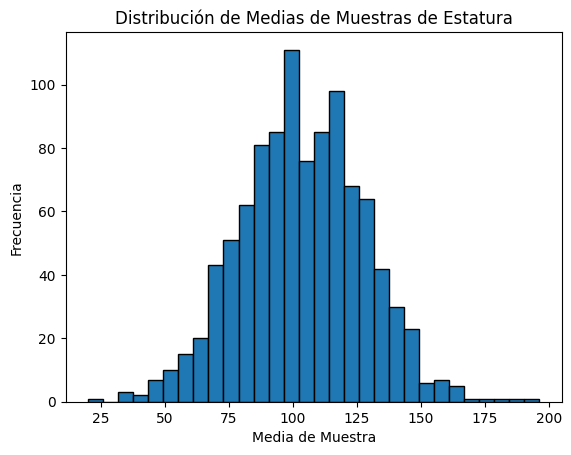

In [48]:
#8. comprobar el teroema del limite central la estatura
import numpy as np
import matplotlib.pyplot as plt

estatura = df['Height']  

tamaño_muestra = 30  
n_muestras = 1000  
medias_muestras = []
for _ in range(n_muestras):
    muestra = np.random.choice(estatura, tamaño_muestra)
    media_muestra = np.mean(muestra)
    medias_muestras.append(media_muestra)

plt.hist(medias_muestras, bins=30, edgecolor='k')
plt.title('Distribución de Medias de Muestras de Estatura')
plt.xlabel('Media de Muestra')
plt.ylabel('Frecuencia')
plt.show()
